In [1]:
%matplotlib notebook
import os
import numpy as np
import chaospy as cp
import pandas as pd
import seaborn as sns
import itertools
import pickle
from numpy import linalg as LA
from matplotlib import pyplot as plt,cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel,WhiteKernel)
pltlinestyles = [ (0, (1, 5)),(0, (3, 5, 1, 5)),(0, (5, 5)),(0, ()), (0, (3, 1, 1, 1, 1, 1)), 
        (0, (5, 10)), (0, (3, 10, 1, 10)), (0, (3, 10, 1, 10, 1, 10)),(0, (1, 10)), 
        (0, (5, 1)),  (0, (3, 1, 1, 1)),(0, (3, 5, 1, 5, 1, 5)),  (0, (1, 1))  ]*10

pltmarkers =['o','v','s','d','+','*']
ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(math.floor(n/10)%10!=1)*(n%10<4)*n%10::4])
pltcolors = plt.rcParams['axes.prop_cycle'].by_key()['color']


In [2]:
MODEL_NAME      = 'Bench4'
DATA_DIR        = '/Users/jinsongliu/External/MUSE_UQ_DATA'
MODEL_DIR_DATA  = os.path.join(DATA_DIR,MODEL_NAME,r'Data')
MODEL_DIR_FIGURE= os.path.join(os.getcwd(), MODEL_NAME,r'Figures')

class Ecdf2plot: 
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [3]:
figsize = (4*1.5,3*1.5)
pf = 1e-4

In [4]:
x_fix = np.linspace(-5,15,1000)[np.newaxis, :]

noise_type = 'DATA_NOISE_NORMAL'

(3, 1000)
(1000,) (1000,)


<IPython.core.display.Javascript object>


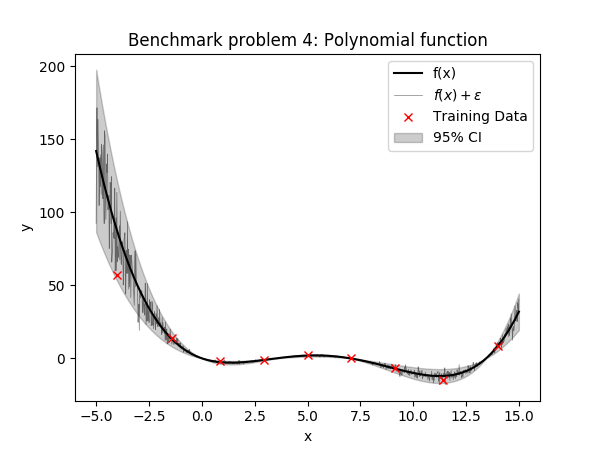

(5, 1000)
5
x_train shape:(9,)
x_weight shape:(9,)
y_train shape:(9,)
error mean shape:()
error std  shape:(9,)


In [34]:
data_set = np.load(os.path.join(MODEL_DIR_DATA,r'bench4_noise_free.npy'))
print(data_set.shape)
x,y_mean = data_set[0],data_set[1]
# print(data_set[0].shape, data_set[1].shape)
print(x.shape, y_mean.shape)
fig1= plt.figure(figsize=figsize)
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(x,y_mean,'k',label=r'f(x)')

data_set = np.load(os.path.join(MODEL_DIR_DATA,r'bench4_normal.npy'))
print(data_set.shape)
x_samples,y_samples = data_set[0],data_set[1]
std = data_set[4]

ax1.plot(x_samples,y_samples,'-k',label=r'$f(x)+\epsilon$',alpha=0.5,linewidth=0.5)
ax1.fill_between(x, y_mean + 1.96*std, y_mean - 1.96*std, color='k',alpha=0.2,edgecolor='None',label='95% CI')

data_set = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'Observation_normal_DoE0.npy'))
print(len(data_set))
x_train    = np.squeeze(data_set[0][0])
x_weight   = np.squeeze(data_set[0][1])
y_train    = np.squeeze(data_set[1])
zeta_train = np.squeeze(data_set[2][0])
error_mean = np.squeeze(data_set[3])
error_std  = np.squeeze(data_set[4])
# y_validate = np.squeeze(data_set[3])
# x_test     = np.squeeze(data_set[4])
# y_test     = np.squeeze(data_set[6])
print('x_train shape:{}'.format(x_train.shape))
print('x_weight shape:{}'.format(x_weight.shape))
print('y_train shape:{}'.format(y_train.shape))
print('error mean shape:{}'.format(error_mean.shape))
print('error std  shape:{}'.format(error_std.shape))
# print('y_validate shape:{}'.format(y_validate.shape))
# print('x_test shape:{}'.format(x_test.shape))
# print('y_test shape:{}'.format(y_test.shape))

ax1.plot(x_train,y_train,'rx',zorder=9, label=r'Training Data')


# for i, imetamodel_basis in enumerate(metamodel_basis):
#     ax1.plot(x_train,y_validate[i,:],'o',
#              markeredgecolor=pltcolors[i], markerfacecolor='w',
#              label=r'$PCE: p={:d}$'.format(imetamodel_basis))
#     ax1.plot(x_test,y_test[i,:],'-',color=pltcolors[i],alpha=0.4)

ax1.set_xlabel('x')
ax1.set_ylabel('y')
# ax1.set_title(r'{} surrogate model: {}'.format(metamodel_class,MODEL_NAME))
ax1.set_title(r'Benchmark problem 4: Polynomial function')
ax1.legend()
fig1.savefig(os.path.join(MODEL_DIR_FIGURE, r'{}_DoE0.pdf'.format(metamodel_class)))

(1000, 1) (1000, 1)


<IPython.core.display.Javascript object>


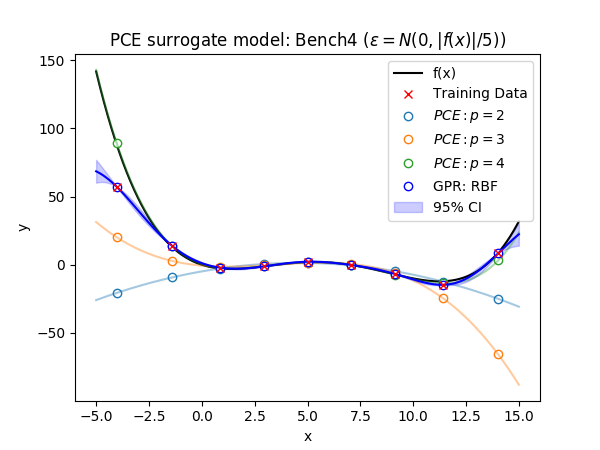

8
x_train shape:(9,)
x_weight shape:(9,)
y_train shape:(9,)
y_validate shape:(3, 9)
x_test shape:(1000,)
y_test shape:(3, 1000)


In [49]:
metamodel_class, metamodel_basis= ['PCE', [2,3,4]]
data_set = np.load(os.path.join(MODEL_DIR_DATA,r'True_domain_FIX_DoE_fix0.npy'))
x,y = data_set[0].T,data_set[1].T
# print(data_set[0].shape, data_set[1].shape)
print(x.shape, y.shape)
fig1 = plt.figure(figsize=figsize)
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(x,y,'k',label=r'f(x)')
data_set = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'Observation_PCE_validation_test_DoE0.npy'))
print(len(data_set))
x_train    = np.squeeze(data_set[0])
x_weight   = np.squeeze(data_set[1])
y_train    = np.squeeze(data_set[2])
zeta_train = np.squeeze(data_set[3])
y_validate = np.squeeze(data_set[4])
x_test     = np.squeeze(data_set[5])
y_test     = np.squeeze(data_set[7])
print('x_train shape:{}'.format(x_train.shape))
print('x_weight shape:{}'.format(x_weight.shape))
print('y_train shape:{}'.format(y_train.shape))
print('y_validate shape:{}'.format(y_validate.shape))
print('x_test shape:{}'.format(x_test.shape))
print('y_test shape:{}'.format(y_test.shape))

ax1.plot(x_train,y_train,'rx',zorder=9, label=r'Training Data')

for i, imetamodel_basis in enumerate(metamodel_basis):
    ax1.plot(x_train,y_validate[i,:],'o',
             markeredgecolor=pltcolors[i], markerfacecolor='w',
             label=r'$PCE: p={:d}$'.format(imetamodel_basis))
    ax1.plot(x_test,y_test[i,:],'-',color=pltcolors[i],alpha=0.4)

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title(u'{} surrogate model: {} $(\epsilon=N(0,|f(x)|/5))$'.format(metamodel_class,MODEL_NAME))
ax1.legend()
fig1.savefig(os.path.join(MODEL_DIR_FIGURE, r'{}_DoE0.pdf'.format(metamodel_class)))


In [50]:
metamodel_class, metamodel_basis = ['PCE', ['RBF']]
data_set = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'Observation_GPR_validation_test_DoE0.npy'))
print(len(data_set))
x_train    = np.squeeze(data_set[0])
x_weight   = np.squeeze(data_set[1])
y_train    = np.squeeze(data_set[2])
zeta_train = np.squeeze(data_set[3])
y_validate = np.squeeze(data_set[4][0,:])
y_valid_std= np.squeeze(data_set[4][1,:])
x_test     = np.squeeze(data_set[5])
y_test_mean= np.squeeze(data_set[7][0,:])
y_test_std = np.squeeze(data_set[7][1,:])
print('x_train shape:{}'.format(x_train.shape))
print('x_weight shape:{}'.format(x_weight.shape))
print('y_train shape:{}'.format(y_train.shape))
print('y_validate shape:{}'.format(y_validate.shape))
print('x_test shape:{}'.format(x_test.shape))
print('y_test shape:{}'.format(y_test.shape))

# x_train    = np.squeeze(data_set[0][0])
# x_weight   = np.squeeze(data_set[0][1])
# y_train    = np.squeeze(data_set[1])
# zeta_train = np.squeeze(data_set[2][0])
# y_validate = np.squeeze(data_set[3][0,:])
# y_valid_std= np.squeeze(data_set[3][1,:])
# x_test     = np.squeeze(data_set[4])
# y_test_mean= np.squeeze(data_set[6][0,:])
# y_test_std = np.squeeze(data_set[6][1,:])
print(data_set[3].shape)
print(x_train.shape,y_validate.shape)

ax1.plot(x_train,y_validate,'o', markeredgecolor='b', markerfacecolor='w', label=r'GPR: RBF')

ax1.plot(x_test,y_test_mean,'-', color='b')
ax1.fill_between(x_test, y_test_mean - 1.96*y_test_std, y_test_mean + 1.96*y_test_std,
                 color='b',alpha=0.2,edgecolor='None',label='95% CI')
ax1.legend()
# ax.xlabel('x')
# plt.ylabel('y')
# plt.title(r'{} surrogate model: {} $(\epsilon=0)$'.format(metamodel_class,MODEL_NAME))
fig1.savefig(os.path.join(MODEL_DIR_FIGURE, r'{}PCE_DoE0.pdf'.format(metamodel_class)))

8
x_train shape:(9,)
x_weight shape:(9,)
y_train shape:(9,)
y_validate shape:(9,)
x_test shape:(1000,)
y_test shape:(3, 1000)
(9,)
(9,) (9,)


#### Exceedance plot

In [53]:
windowlength2plot    = 1000

# Emperial CDF for true model with MCS

true_y_mcs_ecdf      = [] 
true_y_mcs_ecdf2plot = [] 
for r in range(10):
    data_set = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'bench4_normal_MC_DoE{}.npy'.format(r)))
    print(data_set.shape)
    ture_x_mcs    = data_set[0]
    true_y_mcs    = data_set[1]
    true_zeta_mcs = data_set[2]
    iecdf = ECDF(np.squeeze(true_y_mcs))
    true_y_mcs_ecdf.append(iecdf)
    
    indx1 = np.linspace(0,len(iecdf.x)-windowlength2plot, windowlength2plot, dtype=np.int32)
    indx2 = np.arange(indx1[-1]+1,len(iecdf.x),dtype=np.int32)
    indx  = np.hstack((indx1,indx2))
    true_y_mcs_ecdf2plot.append(Ecdf2plot(iecdf.x[indx],iecdf.y[indx]))
#     print(np.round(true_zeta_mcs[:5],4))
    
#     metamodel_zeta_mcs = data_set[2]
    



(5, 10000000)
(5, 10000000)
(5, 10000000)
(5, 10000000)
(5, 10000000)
(5, 10000000)
(5, 10000000)
(5, 10000000)
(5, 10000000)
(5, 10000000)


In [57]:
# Emperial CDF for PCE Surrogate model with MCS
metamodel_class, metamodel_basis= ['PCE', [2,3,4]]
pce_y_mcs_ecdf = [[] for _ in range(len(metamodel_basis))] 
pce_y_mcs_ecdf2plot = [[] for _ in range(len(metamodel_basis))]

for r in range(10):
    data_set = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'metamodels_PCE_DoE0_MCS{}.npy'.format(r)))
    print(data_set[0].shape)
    print(data_set[1].shape)
    zeta_mcs = data_set[0]
    y_mcs    = data_set[1]
    for i, imetamodel_y_mcs in enumerate(y_mcs):
        iecdf = ECDF(np.squeeze(imetamodel_y_mcs))
        pce_y_mcs_ecdf[i].append(iecdf)
        
        indx1 = np.linspace(0,len(iecdf.x)-windowlength2plot, windowlength2plot, dtype=np.int32)
        indx2 = np.arange(indx1[-1]+1,len(iecdf.x),dtype=np.int32)
        indx  = np.hstack((indx1,indx2))
        pce_y_mcs_ecdf2plot[i].append(Ecdf2plot(iecdf.x[indx],iecdf.y[indx]))
   


(1, 10000000)
(3, 10000000)
(1, 10000000)
(3, 10000000)
(1, 10000000)
(3, 10000000)
(1, 10000000)
(3, 10000000)
(1, 10000000)
(3, 10000000)
(1, 10000000)
(3, 10000000)
(1, 10000000)
(3, 10000000)
(1, 10000000)
(3, 10000000)
(1, 10000000)
(3, 10000000)
(1, 10000000)
(3, 10000000)


<IPython.core.display.Javascript object>


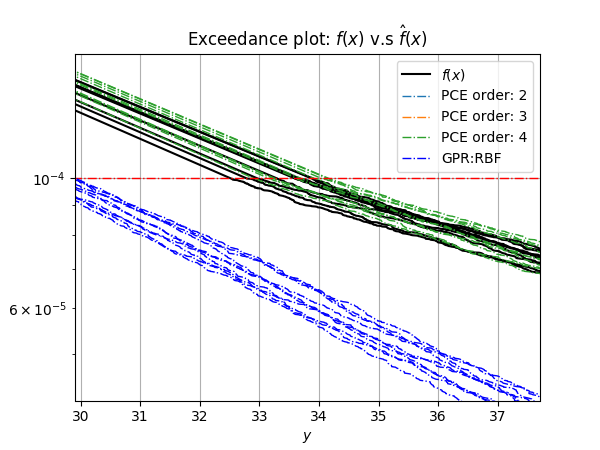

0
1
2


In [58]:
# Exceedance plot
metamodel_class, metamodel_basis= ['PCE', [2,3,4]]
label_added =False
fig2 = plt.figure(figsize=figsize)
ax2 = fig2.add_subplot(1,1,1)
# Ture model emperical exceedance plot with mcs results
for iecdf2plot in true_y_mcs_ecdf2plot:
    if not label_added:
        ax2.semilogy(iecdf2plot.x, 1-iecdf2plot.y,'k', label=r'$f(x)$')
        label_added =True
    else:
        ax2.semilogy(iecdf2plot.x, 1-iecdf2plot.y,'k')    
    
# i = 0
for i, imetamodel_ecdfs in enumerate(pce_y_mcs_ecdf2plot):
    print(i)
    label_added =False
    for iecdf2plot in imetamodel_ecdfs:
        if not label_added:
            ax2.semilogy(iecdf2plot.x, 1-iecdf2plot.y,'-.',color=pltcolors[i],linewidth=1, label=r'PCE order: {}'.format(metamodel_basis[i]))
            label_added =True
        else:
            ax2.semilogy(iecdf2plot.x, 1-iecdf2plot.y,'-.',color=pltcolors[i],linewidth=1)
#     i+=1
#     print(i)
        
# plt.semilogy(ecdf_y.x,1-ecdf_y.y, 'k',label=r'exact')
# plt.semilogy(ecdf_y_norm.x,1-ecdf_y_norm.y, '-.r',label=r'normal error')
# print(ecdf_y_pce)
# for iecdf in ecdf_y_pce:
ax2.set_xlim(0,80)
ax2.set_ylim(1e-5,2)
xmin, xmax = ax2.get_xlim()
ymin, ymax = ax2.get_ylim()
ax2.plot([xmin,xmax],[pf,pf],'-.r',linewidth=1)
ax2.text(60,pf*1.2,r'$p_f={:.0e}$'.format(pf))

ax2.set_xlabel(r'$y$')
ax2.set_ylabel(r'Exceedance probability $\mathcal{P}\;(Y>y)$')
ax2.set_title(r'Exceedance plot: $f(x)$ v.s $\hat{f}(x)$')
plt.legend()
plt.grid()
plt.savefig(os.path.join(MODEL_DIR_FIGURE, r'ExceedancePlot_{}_DoE0.pdf'.format(metamodel_class)))


In [59]:
plt.savefig(os.path.join(MODEL_DIR_FIGURE, r'ExceedancePlot_{}_DoE0_zoomin.pdf'.format(metamodel_class)))


In [61]:
metamodel_class, metamodel_basis = ['PCE', ['RBF']]
gpr_y_mcs_ecdf = [] 
gpr_y_mcs_ecdf2plot = []
for r in range(10):
    data_set = np.load(os.path.join(MODEL_DIR_DATA,noise_type,r'metamodels_GPR_DoE0_MCS{}.npy'.format(r)))
    print(data_set[0].shape)
    print(data_set[1].shape)
    zeta_mcs = data_set[0]
    y_mcs    = data_set[1][0,:]

    iecdf = ECDF(np.squeeze(y_mcs))
    gpr_y_mcs_ecdf.append(iecdf)

    indx1 = np.linspace(0,len(iecdf.x)-windowlength2plot, windowlength2plot, dtype=np.int32)
    indx2 = np.arange(indx1[-1]+1,len(iecdf.x),dtype=np.int32)
    indx  = np.hstack((indx1,indx2))
    gpr_y_mcs_ecdf2plot.append(Ecdf2plot(iecdf.x[indx],iecdf.y[indx]))
   

(1, 10000000)
(2, 10000000)
(1, 10000000)
(2, 10000000)
(1, 10000000)
(2, 10000000)
(1, 10000000)
(2, 10000000)
(1, 10000000)
(2, 10000000)
(1, 10000000)
(2, 10000000)
(1, 10000000)
(2, 10000000)
(1, 10000000)
(2, 10000000)
(1, 10000000)
(2, 10000000)
(1, 10000000)
(2, 10000000)


In [62]:
metamodel_class, metamodel_basis = ['PCE', ['RBF']]
label_added =False    
for imetamodel_ecdfs in gpr_y_mcs_ecdf2plot:
    iecdf2plot = imetamodel_ecdfs
    if not label_added:
        ax2.semilogy(iecdf2plot.x, 1-iecdf2plot.y,'-.',color='b',linewidth=1, label=r'GPR:RBF')
        label_added =True
    else:
        ax2.semilogy(iecdf2plot.x, 1-iecdf2plot.y,'-.',color='b',linewidth=1)
#     print(i)
ax2.legend()
# ax2.grid()
fig2.savefig(os.path.join(MODEL_DIR_FIGURE, r'ExceedancePlot_{}PCE_DoE0.pdf'.format(metamodel_class)))

In [63]:
plt.savefig(os.path.join(MODEL_DIR_FIGURE, r'ExceedancePlot_{}_PCE_DoE0_zoomin.pdf'.format(metamodel_class)))
